In [251]:
import numpy as np
import matplotlib.pyplot as plt

In [252]:
def f_x(x):
    return np.log(x)*x

In [253]:
# Метод прямоугольников
def rectangle(a_b, h):
    
    f_left = [0]*len(a_b)

    for i in range(len(a_b) - 1):
        f_left[i] = f_x(a_b[i])

    f_left[len(a_b) - 1] = f_x(a_b[len(a_b) - 1])

    I_l = f_left[0] * h

    for j in range(1, len(a_b)):
        I_l += (f_left[j-1]*h)
    return I_l


In [254]:
# Метод трапеций
def trapezoid(a_b, h):
    
    f_tr = [0]*len(a_b)

    for i in range(len(a_b)):
        f_tr[i] = f_x(a_b[i])

    I_tr = 0

    for j in range(len(a_b) - 1):
        I_tr += (f_tr[j] + f_tr[j+1])*(h/2)
    return I_tr


In [255]:
#Метод Симпсона
def Simps(a_b, h, a, b):
    
    f_s = [0]*len(a_b)

    for i in range(len(a_b)):
        f_s[i] = f_x(a_b[i])

    I_s = 0
    N = int((b - a) / h)
    
    a_b_h = np.linspace(a , b , N)
    
    
    if(N%3 == 0 or N%3 == 2):
        
        for j in range(1, N, 2):
            
            if(j == N-1):
                I_s +=(h/3)*(f_x(a_b_h[j-1]) + 4*f_x(a_b_h[j-1] + h/2) + f_x(b))
                
            else:
                I_s +=(h/3)*(f_x(a_b_h[j-1]) + 4*f_x(a_b_h[j]) + f_x(a_b_h[j+1]))
    else:
        for j in range(1, N-1, 2):
            I_s +=(h/3)*(f_x(a_b_h[j-1]) + 4*f_x(a_b_h[j]) + f_x(a_b_h[j+1]))
                    
    return I_s


In [256]:
a = 1
b = 2
h_array = [0.001, 0.002, 0.005, 0.01, 0.02, 0.04, 0.05, 0.1, 0.2, 0.5]

const = 0.636294361119891

rect_arr = [0]*(len(h_array))
tr_arr = [0]*(len(h_array))
Simp_arr = [0]*(len(h_array))

for hh in h_array:
    m = int((b-a)/hh)
    a_b = np.linspace(a,b,m)
    
    i_r_k = rectangle(a_b, hh)
    i_t_k = trapezoid(a_b, hh)
    i_s_k = Simps(a_b, hh, a, b)
    
    rect_arr[h_array.index(hh)] = abs(i_r_k - const)
    tr_arr[h_array.index(hh)] = abs(i_t_k - const)
    Simp_arr[h_array.index(hh)] = abs(i_s_k - const)

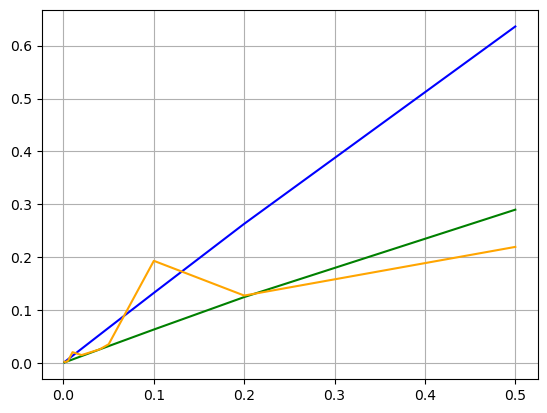

In [257]:
plt.grid()
plt.plot(h_array, rect_arr, 'blue')
plt.plot(h_array, tr_arr, 'green')
plt.plot(h_array, Simp_arr, 'orange');

In [258]:
h_log = [np.log(x) for x in h_array]
rect_arr_log = [np.log(x) for x in rect_arr]
tr_arr_log = [np.log(x) for x in tr_arr]
Simp_arr_log = [np.log(x) for x in Simp_arr]

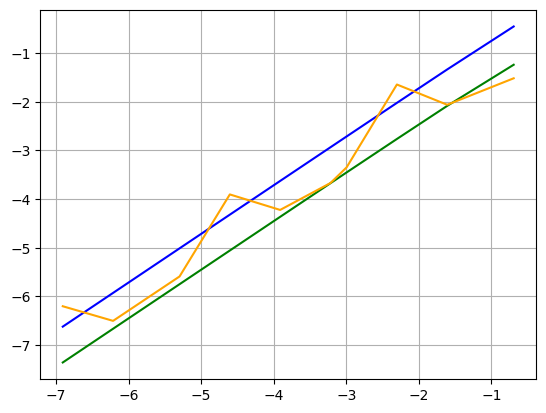

In [259]:
plt.grid()
plt.plot(h_log, rect_arr_log, 'blue')
plt.plot(h_log, tr_arr_log, 'green')
plt.plot(h_log, Simp_arr_log, 'orange');